In [380]:
import pandas as pd

In [382]:
test_data = pd.read_csv('test.csv')

In [384]:
train_data = pd.read_csv('train.csv')

In [386]:
data = pd.concat([train_data, test_data], ignore_index=True)

In [388]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [390]:
import seaborn as sns

<Axes: >

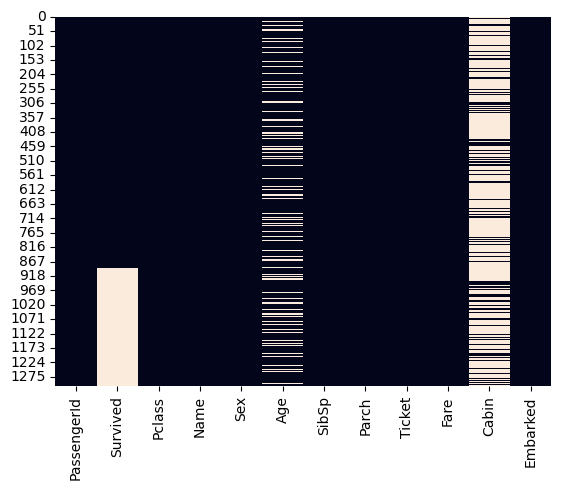

In [392]:
sns.heatmap(data.isnull(), cbar = False)

In [393]:
data['Sex'] = data['Sex'].map({'male' : 0, 'female' : 1})

In [396]:
data['Embarked'] = data['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

In [398]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.')

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\user\AppData\Local\Temp\ipykernel_17524\2275135050.py:1: SyntaxWarning: invalid escape sequence '\.'
  data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.')


In [400]:
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

In [402]:
data['Title'] = data['Title'].map({'Mr': 1, 'Master': 2, 'Mrs': 3, 'Miss': 4, 'Other': 5})

In [404]:
data[['Ticket_Prefix', 'Ticket_Number']] = data['Ticket'].str.extract(r'^([^\s]*?)\s*(\d+)$')

In [462]:
data['Family'] = data['SibSp'] + data['Parch']

In [464]:
data['Is_Single'] = data['Family'] == 0

In [468]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_Prefix,Ticket_Number,Survivedd,Family,Is_Single
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1,A/5,21171,True,1,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,3,PC,17599,True,1,False
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,4,STON/O2.,3101282,True,0,True
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,3,,113803,True,1,False
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,1,,373450,True,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,0.0,1,A.5.,3236,False,0,True
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1.0,5,PC,17758,False,0,True
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0.0,1,SOTON/O.Q.,3101262,False,0,True
1307,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,0.0,1,,359309,False,0,True


In [408]:
data['Survivedd'] = data['Survived'].notnull()

In [474]:
data_for_corr = data[['Survived', 'Age', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Ticket_Number', 'Title', 'Is_Single', 'Family']]

In [475]:
data_for_corr.corr()

,Survived,Age,Pclass,Sex,Fare,Embarked,Ticket_Number,Title,Is_Single,Family
Survived,1.000000,-0.077221,-0.338481,0.543351,0.257307,0.108669,-0.116024,0.492031,-0.203367,0.016639
Age,-0.077221,1.000000,-0.408106,-0.063645,0.178740,0.048993,-0.130213,-0.115947,0.128755,-0.240229
Pclass,-0.338481,-0.408106,1.000000,-0.124617,-0.558629,0.037527,0.277875,-0.136823,0.147393,0.050027
Sex,0.543351,-0.063645,-0.124617,1.000000,0.185523,0.121868,-0.022379,0.870064,-0.284537,0.188583
Fare,0.257307,0.178740,-0.558629,0.185523,1.000000,0.062017,-0.152462,0.178217,-0.274895,0.226492
Embarked,0.108669,0.048993,0.037527,0.121868,0.062017,1.000000,-0.104249,0.143246,0.047611,-0.101097
Ticket_Number,-0.116024,-0.130213,0.277875,-0.022379,-0.152462,-0.104249,1.000000,-0.019377,0.016963,0.019133
Title,0.492031,-0.115947,-0.136823,0.870064,0.178217,0.143246,-0.019377,1.000000,-0.250012,0.206153
Is_Single,-0.203367,0.128755,0.147393,-0.284537,-0.274895,0.047611,0.016963,-0.250012,1.000000,-0.688864
Family,0.016639,-0.240229,0.050027,0.188583,0.226492,-0.101097,0.019133,0.206153,-0.688864,1.000000


In [ ]:
data['Age'] = data['Age'].fillna(data_missing_age['Age'])

In [ ]:
data = data.drop(columns=['Survivedd'])

In [ ]:
data

In [480]:
data_with_survived = data[data['Survived'].notna()]

In [482]:
data_with_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_Prefix,Ticket_Number,Survivedd,Family,Is_Single
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1,A/5,21171,True,1,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,3,PC,17599,True,1,False
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,4,STON/O2.,3101282,True,0,True
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,3,,113803,True,1,False
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,1,,373450,True,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0.0,5,,211536,True,0,True
887,888,1.0,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0.0,4,,112053,True,0,True
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0.0,4,W./C.,6607,True,3,False
889,890,1.0,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1.0,1,,111369,True,0,True


In [709]:
X = data_with_survived[['Sex', 'Title', 'Fare', 'Embarked']]

In [711]:
y = data_with_survived['Survived']

In [713]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [714]:
from sklearn.tree import DecisionTreeClassifier

In [715]:
clf = DecisionTreeClassifier(random_state = 42)

In [716]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [717]:
y_pred = clf.predict(X_test)

In [723]:
from sklearn.metrics import accuracy_score

In [724]:
accuracy = accuracy_score(y_test, y_pred)

In [727]:
accuracy

0.8340807174887892

In [534]:
X_test = data[data['Survived'].isna()][['Sex', 'Title', 'Fare', 'Embarked']]
y_train = data[data['Survived'].isna()]

In [536]:
X_test

,Sex,Title,Fare,Embarked
891,0,1,7.8292,2.0
892,1,3,7.0000,0.0
893,0,1,9.6875,2.0
894,0,1,8.6625,0.0
895,1,3,12.2875,0.0
...,...,...,...,...
1304,0,1,8.0500,0.0
1305,1,5,108.9000,1.0
1306,0,1,7.2500,0.0
1307,0,1,8.0500,0.0


In [538]:
y_pred = clf.predict(X_test)

In [548]:
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],  
    'Survived': y_pred.astype(int)   
})

submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [762]:
submission.to_csv('submission.csv', index=False)

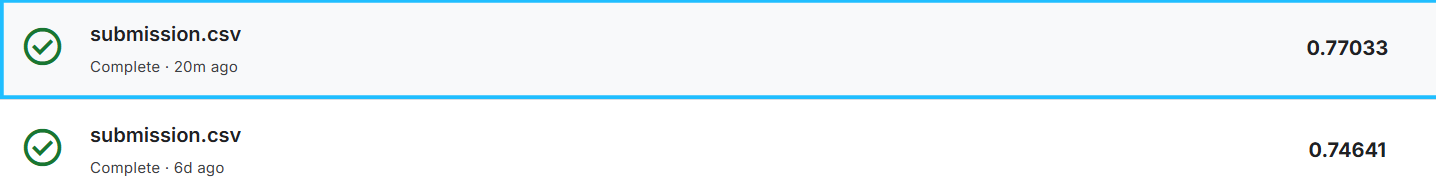